### Part 1. Imbalanced dataset

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

[Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease): classify patients

In [3]:
df = pd.read_csv('thyroid_disease.csv')

In [4]:
df.shape

(3772, 30)

In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [6]:
df['Class'].value_counts()

negative    3541
sick         231
Name: Class, dtype: int64

In [7]:
np.round(df.isnull().mean()*100)

age                            0.0
sex                            4.0
on_thyroxine                   0.0
query_on_thyroxine             0.0
on_antithyroid_medication      0.0
sick                           0.0
pregnant                       0.0
thyroid_surgery                0.0
I131_treatment                 0.0
query_hypothyroid              0.0
query_hyperthyroid             0.0
lithium                        0.0
goitre                         0.0
tumor                          0.0
hypopituitary                  0.0
psych                          0.0
TSH_measured                   0.0
TSH                           10.0
T3_measured                    0.0
T3                            20.0
TT4_measured                   0.0
TT4                            6.0
T4U_measured                   0.0
T4U                           10.0
FTI_measured                   0.0
FTI                           10.0
TBG_measured                   0.0
TBG                          100.0
referral_source     

### Задание 1. 

Есть ли в данных бесполезные колонки? Если да, удалите их.

In [8]:
# YOUR CODE HERE
# to_delete = [x for x in df.columns if 'measured' in x]
# to_delete.append('TBG')
to_delete = ['TBG', ]
df.drop(to_delete, axis=1, inplace=True)

### Задание 2. 

Ипользуя `LabelEncoder` закодируйте целевую переменную.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# YOUR CODE HERE
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [11]:
np.unique(df['Class'], return_counts=True)

(array([0, 1]), array([3541,  231]))

### Категориальные переменные

In [12]:
df.describe(include='object')

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,5
top,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,other
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3676,3771,3588,3403,3003,3541,3385,3387,3772,2201


In [13]:
categorical = list(df.iloc[:,(df.dtypes == "object").values].columns)

In [14]:
df.groupby(['sex']).Class.mean()

sex
F    0.054839
M    0.077933
Name: Class, dtype: float64

<ipython-input-15-28812154c53f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(ncols=2, figsize=(9,3))


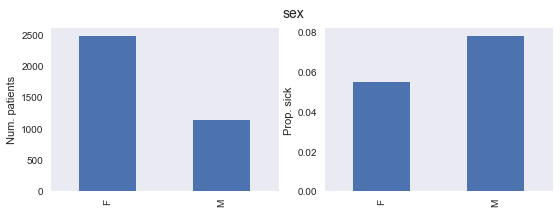

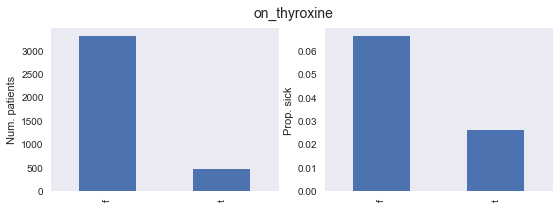

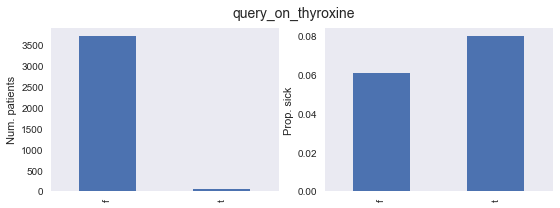

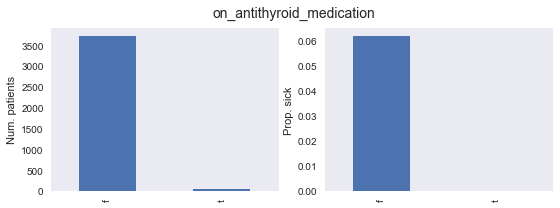

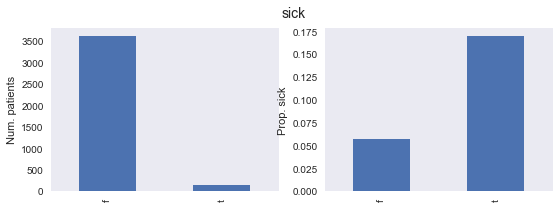

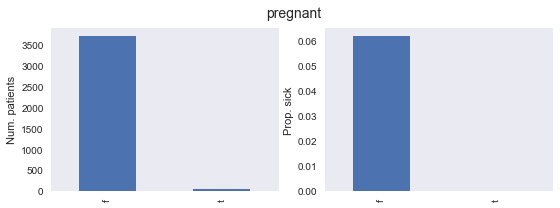

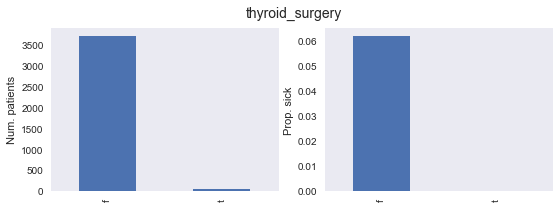

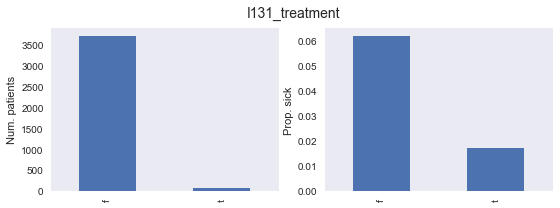

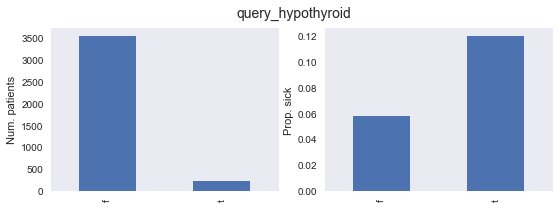

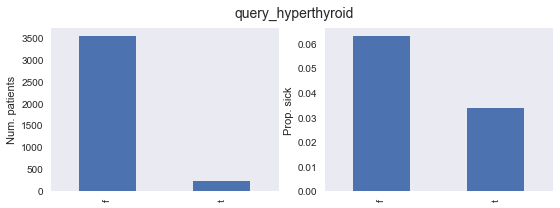

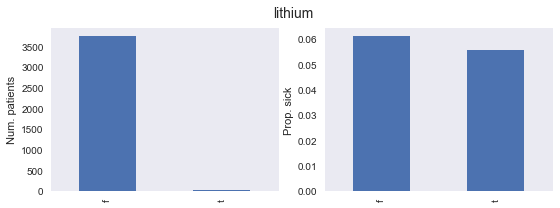

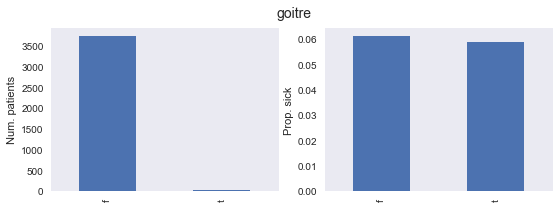

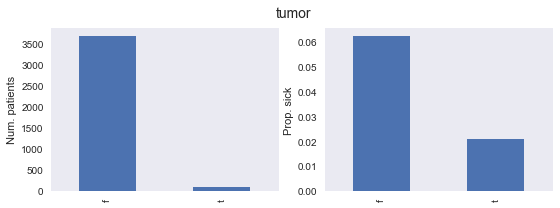

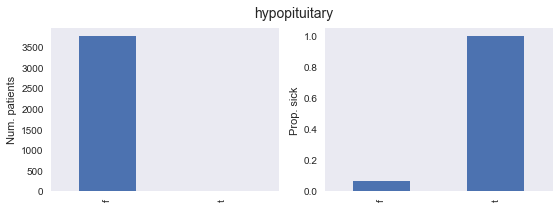

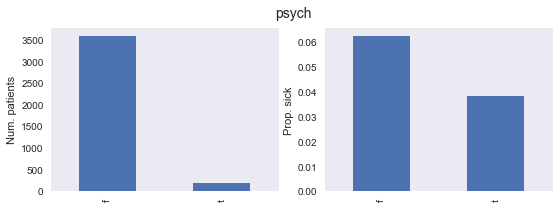

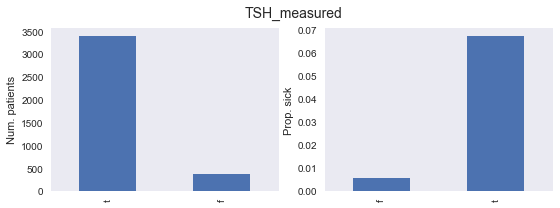

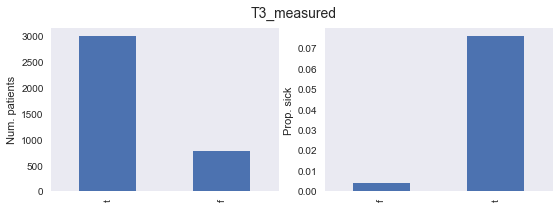

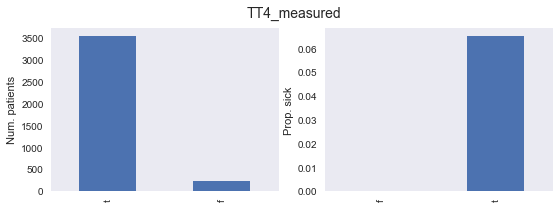

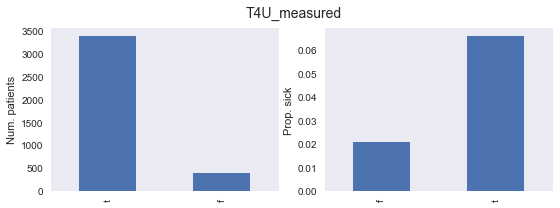

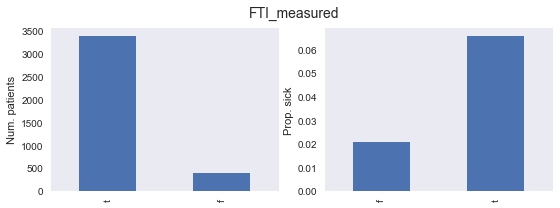

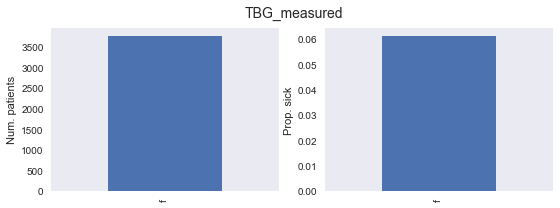

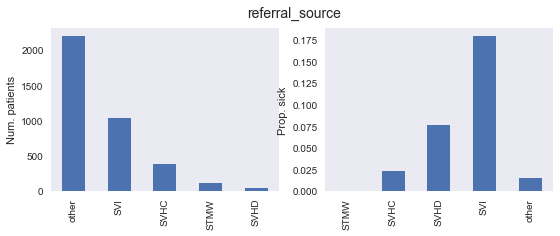

In [15]:
for c in categorical:
    fig, ax = plt.subplots(ncols=2, figsize=(9,3))
    # plot counts
    df[c].value_counts().plot(kind='bar', ax=ax[0])
    
    # plot proportion of positive class
    grouped = df.groupby([c]).Class.mean()
    grouped.plot(kind='bar', ax=ax[1])
    
    # add column name to the title
    fig.suptitle(c, fontsize=14)
    
    # prettify
    ax[0].grid()
    ax[0].set_ylabel('Num. patients')
    ax[1].set_xlabel('')
    ax[1].grid()
    ax[1].set_ylabel('Prop. sick')

In [16]:
df['hypopituitary'].value_counts()
df.drop('hypopituitary', axis=1, inplace=True)
categorical.remove('hypopituitary')

In [17]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,0.061241
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,0.239803
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,0.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,0.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,0.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000


In [18]:
numerical = list(df.iloc[:,(df.dtypes != "object").values].columns)
numerical.remove('Class')

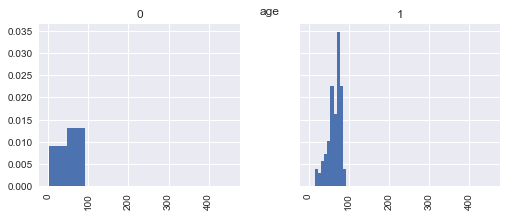

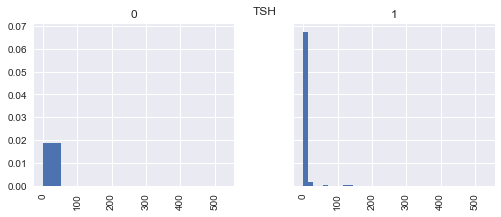

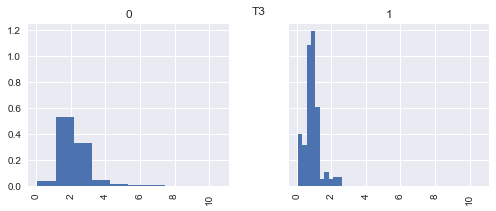

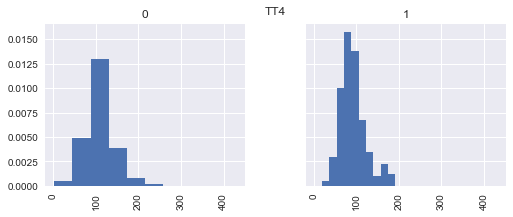

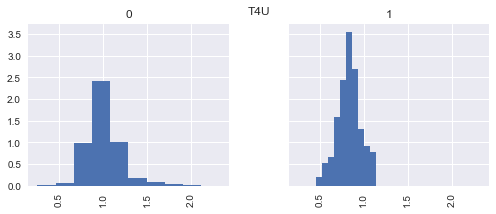

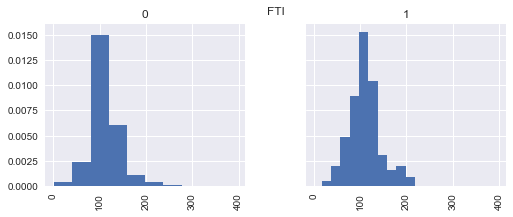

In [19]:
for c in numerical:
    df.hist(column=c, by='Class', bins=10, sharey=True, sharex=True, figsize=(8,3), density=True);
    plt.suptitle(c)

In [20]:
### Выделим целевую переменную
y = df['Class']
X = df.drop(['Class'], axis=1)

Разобъем данные на тренировочную и тестовую выборки

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(np.round((y_train == 1).mean(), 4), np.round((y_test == 1).mean(), 4))

(2829, 27) (943, 27) (2829,) (943,)
0.0633 0.0551


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.round((y_train == 1).mean(), 4), np.round((y_test == 1).mean(), 4))

(2829, 27) (943, 27) (2829,) (943,)
0.0612 0.0615


### Задание 3: Препроцессинг данных

* Категориальные переменные:
    - заполните пропуски значением `unknown`
    - закодировать 'OneHotEncoder'
* Числовые признаки
     - заполнить пропуски средним


Будем использовать комбинацию `make_pipeline` и `ColumnTransformer`

* `make_pipeline` - позволяет объединить несколько трансформеров в один
* `ColumnTransformer` - позволяет применять разные трансформеры / пайплайны к разным колонкам

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [24]:
# define tranformation/pipeline to preprocess categorical features
categ_transform = make_pipeline(SimpleImputer(strategy='constant', fill_value='unknown'), 
                               OneHotEncoder())

# define tranformation/pipeline to preprocess numeric features
numeric_transform = SimpleImputer(strategy='mean')

`ColumnTransformer` принимает на вход список трансформаций. Для каждой можно задать имя и список фичей, к которым применить транформацию:

```
ColumnTransformer([
    ('name1', transorm1, column_names1),
    ('name2', transorm2, column_names2)
])
```

Также стоит обратить внимание на аргумент `remainder='passthrough'`, если вы хотите оставить некоторые колонки нетронутыми.

In [25]:
column_transformer = ColumnTransformer([
    ('categ_prep', categ_transform, categorical), 
    ('numeric_prep', numeric_transform, numerical)], 
    remainder='passthrough')


X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

### Обучение и вывод метрик

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# матрица ошибок
def compute_confusion_matrix(y_test, y_pred):
    return pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1, 0]),
        columns=['a(x) = 1', 'a(x) = 0'],
        index=['y = 1', 'y = 0'],
    ).T

# метрики
def compute_metrics(y_test, y_pred):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('F-score: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    return f1_score(y_test, y_pred)

In [27]:
test_results  = {}

### Задание 4
Заполните пропуски в функции eval_model, используйте ее для обучение RandomForest c 50 деревьями.

In [28]:
def eval_model(model, X_train, y_train, X_test, y_test):
    # fit model
    model.fit(X_train, y_train)
    
    # compute cofusion metrix
    y_pred = model.predict(X_test)
    print(compute_confusion_matrix(y_test, y_pred), '\n')
    
    # compute metrics
    score = compute_metrics(y_test, y_pred)    
    return score

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=13)
f_score = eval_model(rf, X_train, y_train, X_test, y_test)

          y = 1  y = 0
a(x) = 1     44      4
a(x) = 0     14    881 

Accuracy: 0.98
F-score: 0.83
Precision: 0.92
Recall: 0.76


In [30]:
test_results['RF'] = f_score

In [31]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=13)
test_results['RF balanced'] = eval_model(rf, X_train, y_train, X_test, y_test)

          y = 1  y = 0
a(x) = 1     46      1
a(x) = 0     12    884 

Accuracy: 0.99
F-score: 0.88
Precision: 0.98
Recall: 0.79


In [32]:
(y_train == 1).mean(), (y_test == 1).mean()

(0.06115235065394132, 0.061505832449628844)

# Undersampling

## Random

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
us = RandomUnderSampler(random_state=13)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 51) (346, 51)


In [35]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced', )
test_results['Random Undersamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     56     26
a(x) = 0      2    859 

Accuracy: 0.97
F-score: 0.80
Precision: 0.68
Recall: 0.97


Слишком мало тренировочных данных. Уберем поменьше

In [36]:
us = RandomUnderSampler(sampling_strategy=0.2, random_state=13)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 51) (1038, 51)


In [37]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced', )
test_results['Random Undersamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     50      7
a(x) = 0      8    878 

Accuracy: 0.98
F-score: 0.87
Precision: 0.88
Recall: 0.86


## NearMiss

In [38]:
from imblearn.under_sampling import NearMiss

us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=1)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 51) (1038, 51)


In [39]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-1'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     57     36
a(x) = 0      1    849 

Accuracy: 0.96
F-score: 0.75
Precision: 0.61
Recall: 0.98


In [40]:
us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=2)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-2'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

(2829, 40) (1038, 40)
          y = 1  y = 0
a(x) = 1     57    104
a(x) = 0      1    781 

Accuracy: 0.89
F-score: 0.52
Precision: 0.35
Recall: 0.98


In [41]:
us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=3)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-3'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

(2829, 40) (543, 40)
          y = 1  y = 0
a(x) = 1     51      8
a(x) = 0      7    877 

Accuracy: 0.98
F-score: 0.87
Precision: 0.86
Recall: 0.88


/Users/annakuzina/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


# Oversampling

## Random

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
os = RandomOverSampler(sampling_strategy=0.8, random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 40) (4780, 40)


In [44]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['Random Oversamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     49      4
a(x) = 0      9    881 

Accuracy: 0.99
F-score: 0.88
Precision: 0.92
Recall: 0.84


## SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy=0.8, k_neighbors=5, random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 40) (4780, 40)


In [46]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['SMOTE'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     46      4
a(x) = 0     12    881 

Accuracy: 0.98
F-score: 0.85
Precision: 0.92
Recall: 0.79


## BorderlineSMOTE

In [47]:
from imblearn.over_sampling import BorderlineSMOTE
os = BorderlineSMOTE(sampling_strategy=0.8, kind='borderline-1', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 40) (4780, 40)


In [48]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['BorderlineSMOTE-1'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     47      5
a(x) = 0     11    880 

Accuracy: 0.98
F-score: 0.85
Precision: 0.90
Recall: 0.81


In [49]:
os = BorderlineSMOTE(sampling_strategy=0.8, kind='borderline-2', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 40) (4780, 40)


In [50]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['BorderlineSMOTE-2'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     49      5
a(x) = 0      9    880 

Accuracy: 0.99
F-score: 0.88
Precision: 0.91
Recall: 0.84


### Задание 5

* Используя SMOTE увеличьте долю миноритораного класса до 0.5 (oversampling)
* Используя NearMiss-2 увеличьте долю миноритораного класса до 1 (undersampling)
* Обучить модель на полученной выборке

In [51]:
# oversampling
os = BorderlineSMOTE(sampling_strategy=0.5, kind='borderline-2', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

# undersampling
us = NearMiss(sampling_strategy=1, n_neighbors=3, version=3)
X_train_rs, y_train_rs = us.fit_resample(X_train_rs, y_train_rs)
print(X_train.shape, X_train_rs.shape)

rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['Combined'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

(2829, 40) (3984, 40)
(2829, 40) (2187, 40)
          y = 1  y = 0
a(x) = 1     52      7
a(x) = 0      6    878 

Accuracy: 0.99
F-score: 0.89
Precision: 0.88
Recall: 0.90


/Users/annakuzina/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


### Final Plot

(0.8, 0.9)

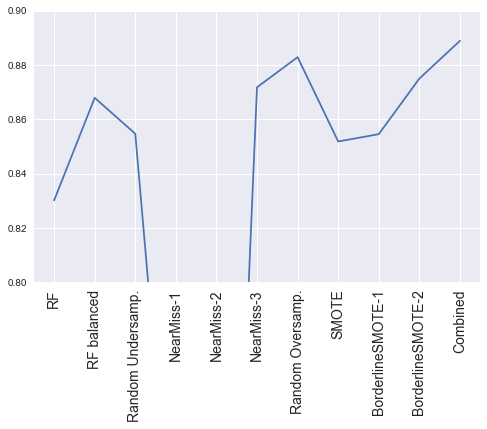

In [52]:
plt.plot(test_results.values())
plt.xticks(range(len(test_results)), labels=test_results.keys(), fontsize=14, rotation='vertical');
plt.ylim(0.8, 0.9)

### Unsupervised Anomaly Detection

Сгенерируем игрушечные датасеты

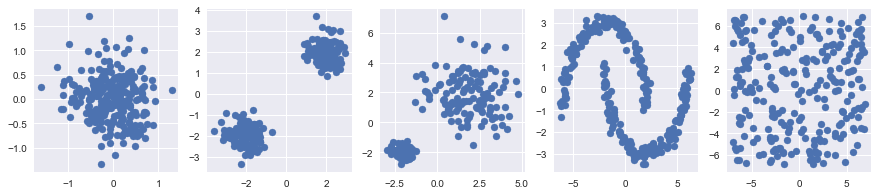

In [55]:
from sklearn.datasets import make_moons, make_blobs

datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, n_samples=255, n_features=2, random_state=13)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], n_samples=255, n_features=2, random_state=13)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], n_samples=255, n_features=2, random_state=13)[0],
    4. * (make_moons(n_samples=255, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(255, 2) - 0.5)
]

fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    ax[i].scatter(datasets[i][:, 0], datasets[i][:, 1]);

Добавим шум

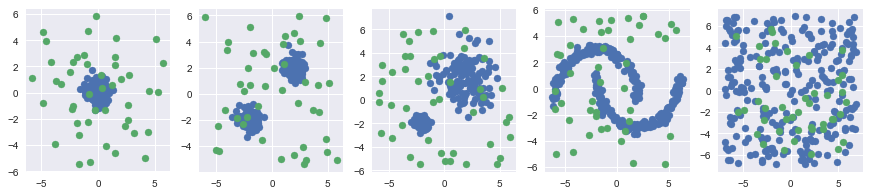

In [56]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
    
np.random.seed(123)
for i in range(len(datasets)):
    datasets[i] = np.concatenate([datasets[i], np.random.uniform(low=-6, high=6, size=(45, 2))], axis=0)
    ax[i].scatter(datasets[i][:255, 0], datasets[i][:255, 1]);
    ax[i].scatter(datasets[i][255:, 0], datasets[i][255:, 1]);

In [57]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

### Local Outlier Factor

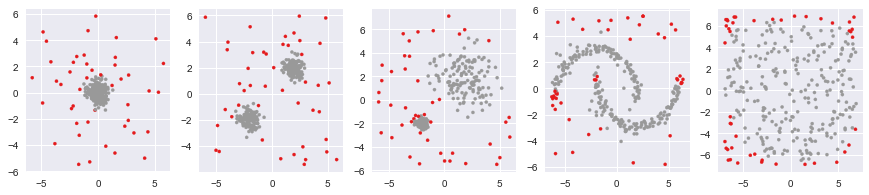

In [58]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    # choose dataset
    X = datasets[i]
    ad = LocalOutlierFactor(n_neighbors=35, contamination=0.15)
    y_pred = ad.fit_predict(X)
    ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')

### One-Class SVM

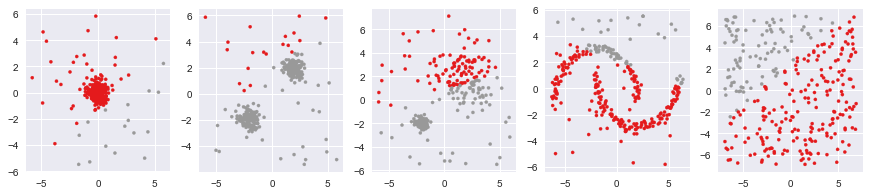

In [59]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    X = datasets[i]
    ad = OneClassSVM(nu=0.15, kernel='linear')
    y_pred = ad.fit_predict(X)
    ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')

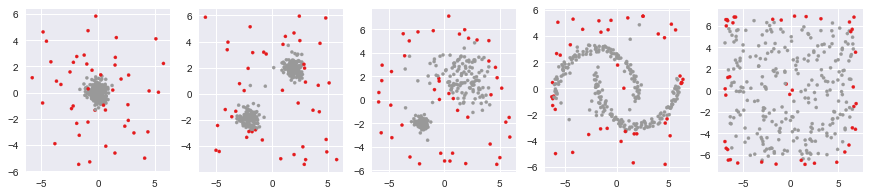

In [60]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    X = datasets[i]
    ad = OneClassSVM(nu=0.15, kernel='rbf')
    y_pred = ad.fit_predict(X)
    ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')

### Isolation Forest

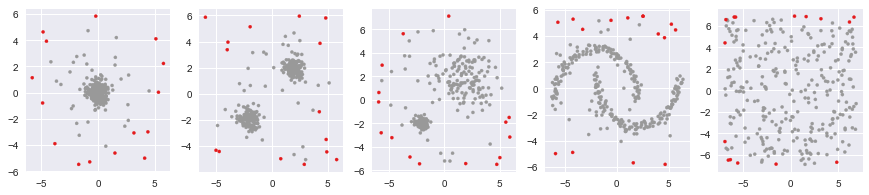

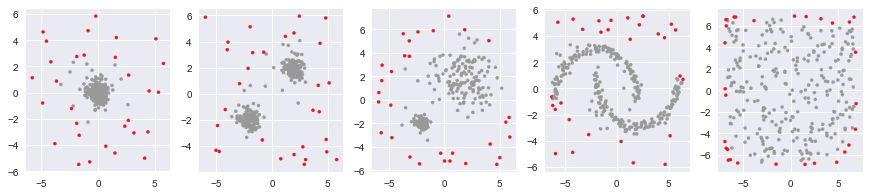

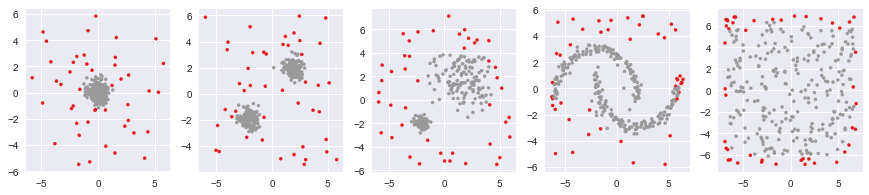

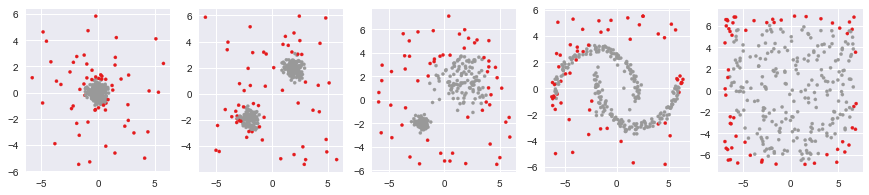

In [61]:
for a in [0.05, 0.1, 0.15, 0.2]:
    fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
    for i in range(len(datasets)):
        X = datasets[i]
        ad = IsolationForest(contamination=a)
        y_pred = ad.fit_predict(X)
        ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')